In [2]:
import matplotlib.pyplot as plt
from Selection import selection
import time
from tqdm import tqdm
import numpy as np
import numpy.random as npr
from scipy.stats import linregress

In [3]:
def benchmark(A: list[int], k: int):
    start = time.perf_counter()
    selection(A, k)
    end = time.perf_counter()
    return end - start

### Selection algorithm runtime

In [4]:
n = [5+1000*x for x in range(101)]
k = 3
times = []
for i in tqdm(n):
    test_list = [(int)(npr.rand() * x) for x in range(1,i)]
    times.append(benchmark(test_list, k))

100%|██████████| 101/101 [00:08<00:00, 11.94it/s]


Text(0.5, 1.0, 'Benchmark n vs time')

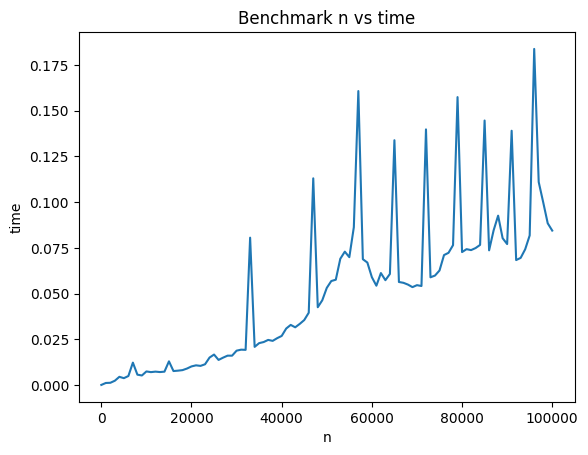

In [5]:
plt.plot(n, times)
plt.xlabel("n")
plt.ylabel("time")
plt.title("Benchmark n vs time")

In [6]:
m, _, _, _, _ = linregress(np.log(n), np.log(times))
m

np.float64(1.0680367155888613)

### Sorting then picking k run time

In [7]:
def sort_k(A: list[int], k: int):
    A.sort()
    return A[k]

In [8]:
def sort_benchmark(A: list[int], k: int):
    start = time.perf_counter()
    sort_k(A, k)
    end = time.perf_counter()
    return end - start

In [9]:
n = [5+1000*x for x in range(1001)]
k = 3
times = []
for i in tqdm(n):
    test_list = [x for x in range (i, 0, -1)]
    times.append(sort_benchmark(test_list, k))

100%|██████████| 1001/1001 [00:36<00:00, 27.61it/s]


Text(0.5, 1.0, 'Benchmark n vs time')

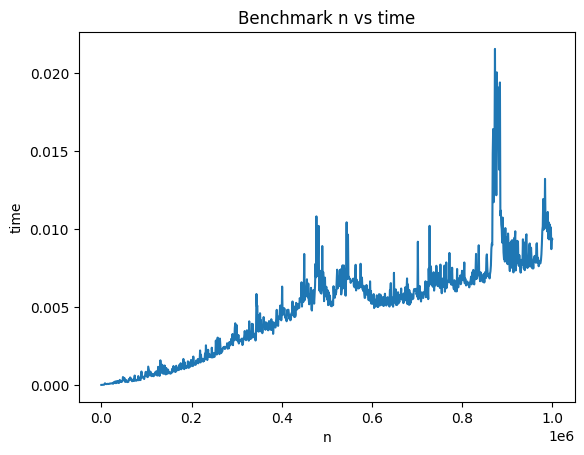

In [10]:
plt.plot(n, times)
plt.xlabel("n")
plt.ylabel("time")
plt.title("Benchmark n vs time")

In [11]:
m, _, _, _, _ = linregress(np.log(n), np.log(times))
m

np.float64(1.143618230587445)